<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(10)) # получение таблицы и добавили резделитель '\t'

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info() # получение общей информации о данных в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:

data['last_price'].min() # 12190.0
data['last_price'].max() # 763000000.0
data['first_day_exposition'].value_counts()
data['rooms'].value_counts()
data['ceiling_height'].describe()
data['floors_total'].describe()
data['living_area'].describe()
data['floor'].value_counts()
data['is_apartment'].value_counts() # False 2725, True 50
data['kitchen_area'].describe()
data['balcony'].value_counts()
data['locality_name'].unique()
data['ceiling_height'].describe(include='o')


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

### Вывод

В таблице 22 столбца и 23699 строк. Тип данных во всех столбцах — bool, float64, int64, object.

В названиях колонок нет нарушений, однако, количество значений в столбцах различается. Значит, в данных есть пропущенные значения. 

С слодбцах поочередно проводим проверку ланных при помощи метода value_counts(). Для некоторых столбцов смотрим минимальные и максимальные значения, например для last_price. Увидели, что самая дешевая квартира стоила 12190. В столбцах total_images, total_area, rooms, floors_total, living_area, floor, kitchen_area, balcony,  не обнаружили ничего необычного.  В столбце first_day_exposition дата записана в формате гггг-мм-дд и слитно со временем, что делает восприятие таких данных неудобным. Видим также, что большинство объявлений было опубликованы в начале 2018 и уонце 2017 г. В столбце ceiling_height видим странные значения высоты потолка, такие как 100 и 27 метров, возможно ошибка при выгрузке или при вводе. В столбце is_apartment в исходных данных ожидается булев тип, однако в информации о данных видим тип object. Возможно, дынные были некоректно заполнены или не заполнены вовсе. В locality_name видно, что что-то пропущено и встречаются варианты поселок Мурино и посёлок Мурино.

Данные были выгружены из двух источников, возможно, это стало причиной такого большого количества пропусков. Необходимо порабатать с ними.



## Предобработка данных

In [4]:
# используем метод isna(), чтобы найти пропущенные значения в столбцах, где данные, очевидно, пропущенны. Посчитали их припомощи метода len()
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
# работа над заменой пропусков в ceiling_height; заменили все пропуски на стандартную высоту потолков в новостройке
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = 2.7


# работа над заменой пропусков в living_area; логичнее заменить пропуски на медианное значение. 
#data.loc[data['living_area'].isna(), 'living_area'] = data['living_area'].sort_values(ascending=True).median()
data['living_ratio'] = data['living_area'] / data['total_area']
# вставляем и  заполненем с группировкой по комнатам
data['living_ratio'] = data['living_ratio'].fillna(data['living_ratio'].median()) 
# заполняем пропуски жилой площади
isna_filter = data['living_area'].isna()
data.loc[isna_filter, 'living_area'] = data.loc[isna_filter, 'total_area'] * data.loc[isna_filter, 'living_ratio']  

# работа над заменой пропусков в is_apartment; доля пропусков существенна, однако их стоит заменить на False, так как люди имеющие апартаменты ответили бы "да".
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

# работа над заменой пропусков в kitchen_area; их доля составляет 9.6%. Поменяем их на медианное значение.
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].sort_values(ascending=True).median()

# работа над заменой пропусков в balcony; логично заменить пропуски на 0, так как если человек не указал количество балконов, видимо их нет
data.loc[data['balcony'].isna(), 'balcony'] = 0

# работа над заменой пропусков в locality_name; здесь пропуски можно заменить на unknown, их доля незначительна
data['locality_name'] = data['locality_name'].fillna('unknown')



<AxesSubplot:xlabel='first_day_exposition'>

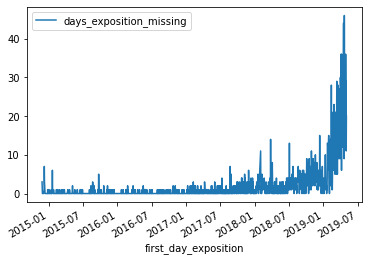

In [6]:
# работа над заменой пропусков в days_exposition
# сначала смотрим, где встречаются эти пропуски

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# создаем столбец, смотрим пропущена дата или нет
data['days_exposition_missing'] = data['days_exposition'].isna().astype(int)
# строим график, видим, что пропуски в конце наблюдаемого периода, логично их не заполнять, так как это скорее всего открытые объявления
data.groupby('first_day_exposition').agg({'days_exposition_missing': 'sum'}).plot()


                

In [7]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23699 non-null  int64         
 1   last_price               23699 non-null  float64       
 2   total_area               23699 non-null  float64       
 3   first_day_exposition     23699 non-null  datetime64[ns]
 4   rooms                    23699 non-null  int64         
 5   ceiling_height           23699 non-null  float64       
 6   floors_total             23613 non-null  float64       
 7   living_area              23699 non-null  float64       
 8   floor                    23699 non-null  int64         
 9   is_apartment             23699 non-null  object        
 10  studio                   23699 non-null  bool          
 11  open_plan                23699 non-null  bool          
 12  kitchen_area             23699 n

### Вывод

Методом data.isna().sum() были выявлены пропуски в следующих столбцах: living_area, floors_total, ceiling_height, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest и  days_exposition.  

Для заполнения пропусков использовали:
- для колонок с высотой потолков и этажностью нашли средние значения в интернете;
- для is_apartment установили значение False вместо пропусков, так как логично предположить, что люди, владеющие апартаментами, указали бы это;
- в колонке с количеством балконов пропуски заменили на 0 (если человек не указал балкон, скорее всего его нет);
- в days_exposition следует не заменять пропуски, так как они возникают в основном за 2019 год, скорее всего это просто открытые объявления;
- в locality_name пропуски заменилина unknown;
- для остальных колонок, где встречаются пропуски, кажется логичным заменить их на медианные значения.

Во время заполнения пропусков также произвели замену некоторых типов данных. Столбец first_day_exposition перевели в datetime64, is_apartment полностью в bool. Также убрали варианты "поселок" и заменила на "посёлок".

В итоге мы увидели достаточно большое количество пропусков. Основная причина, скорее всего, заключается в том, что часть данных заполнялась людьми вручную. 


## Расчёты и добавление результатов в таблицу

In [9]:
# расчитываем стоимость кв метра исходя из стоимости и площади квартиры и добавляем ноый столбец
data['square_meter'] = data['last_price'] / data['total_area']


In [10]:
# содаем колонки с днем, месяцем и годом публикации
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year


In [11]:
# создаем функцию, чтобы разбить этажи на группы
def floors(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_group'] = data.apply(floors, axis=1)


In [12]:
# создаем 2 столбца и добавляем в них соотношение жилой и общей площади и площади кухни к общей
data['living_to_total'] = data['living_area'] / data['total_area']
data['kitchen_to_living'] = data['kitchen_area'] / data['total_area']

### Вывод
В данном пунке были добавлены столбцы со следующими показателями:
- стоимость квадратного метра;
- день, месяц и год публикации;
- этажность разбитую на группы;
- соотношение жилой и общей площади и площади кухни к общей

## Исследовательский анализ данных

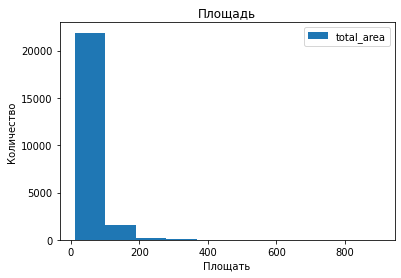

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


In [13]:
# изучение параметров: площадь, цена, число комнат, высота потолков
# строим гистграмму 
import matplotlib.pyplot as plt 
data.plot(y = 'total_area', kind = 'hist', title = 'Площадь')
plt.xlabel('Площать')
plt.ylabel('Количество')
plt.show()
# смотрим список характерных значений
print(data['total_area'].describe())

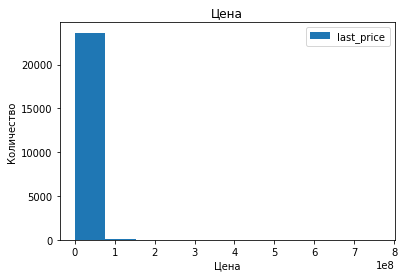

count        23699.000000
mean       6541548.771552
std       10887013.267545
min          12190.000000
25%        3400000.000000
50%        4650000.000000
75%        6800000.000000
max      763000000.000000
Name: last_price, dtype: object


In [14]:
# строим гистграмму 
data.plot(y = 'last_price', kind = 'hist', title ='Цена')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()
# смотрим список характерных значений
print(data['last_price'].describe().apply(lambda x: format(x, 'f')))

Из гистограммы видим, что средняя цена  6541548, медианная цена 4650000. Минимальная и максимальная цена вызывает вопросы, скорее всего придется работать с выбросами. 

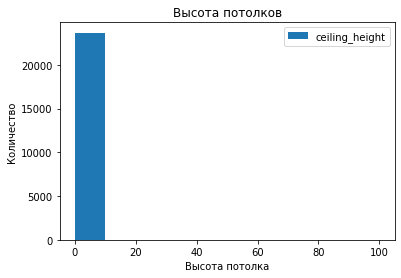

count    23699.000000
mean         2.743758
std          0.987138
min          1.000000
25%          2.600000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


In [15]:
# строим гистграмму 
data.plot(y = 'ceiling_height', kind = 'hist', bins = 10, range=(0,100),  title ='Высота потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество')
plt.show()
# смотрим список характерных значений
print(data['ceiling_height'].describe())
high_ceiling = data.query('ceiling_height > 4')
low_ceiling = data.query('ceiling_height < 2')


Видим, что средняя и медианная потолков составляет 2.7 метра. Можно наблюдать странные значения в минимальном и максимальном значениях.

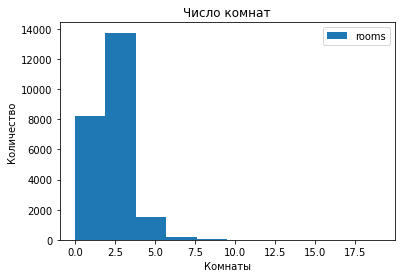

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [16]:
# строим гистграмму 
data.plot(y = 'rooms', kind = 'hist', title = 'Число комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество')
plt.show()
# смотрим список характерных значений
print(data['rooms'].describe())

Из гистограммы видим, что среднее и медианное количество комнат - 2. Также даные говорят о том, что в основном представлены квартиры от 1 до 3 комнат, есть аномалии, их обработаем позже.

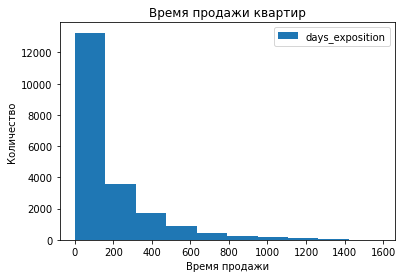

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [17]:
# изучаем время продажи квартир, строим гистограмму
data.plot(y = 'days_exposition', kind = 'hist', title = 'Время продажи квартир')
plt.xlabel('Время продажи')
plt.ylabel('Количество')
plt.show()
# смотрим список характерных значений
print(data['days_exposition'].describe())


Среднее время продажи квартиры - 180 дней.
Медианное время продажи - 95 дней. Эти данные мы взяли из таблицы, полученной методом describe(), где среднее это - mean, а медианное это 50%.
Мы видим, что обычно продажа длится не более 230 дней. По границам квартилей можно оценить  быструю и долгую продажу, это 45 дней и 232 дня соответственно. Мы видим, что в основном квартиры продаются за примерно 180 дней, долгие продажи на графике просматриваются до значения 500, а значения больше 500 практически сливаются с нулем. Это и есть необычно долгие продажи.

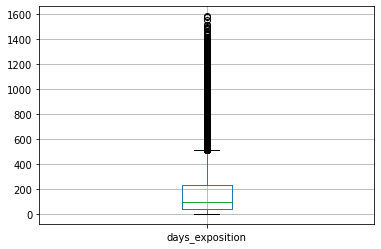

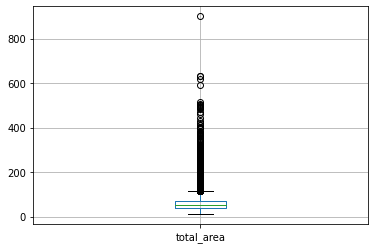

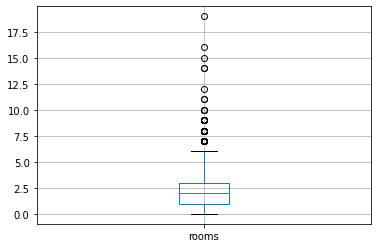

In [18]:
data.boxplot(column = 'days_exposition')
plt.show()
data.boxplot(column = 'total_area')
plt.show()
data.boxplot(column = 'rooms')
plt.show()


Диаграмма размаха подтверждает, что значения больше 500 выходит за пределы размаха (1.5 кв), а это значит, это и есть необычно долгие продажи. Нижний размах совпадает с нулем, это значит, что даже продажи быстрее, чем 45 дней не являются аномалиями, однако являются редкими. 
Далее необходимо убрать выбросы из столбца rooms. Из диаграмм видим, что квартиры с более чем 6 комнатами являются аномалиями.
В столбце total_area выбросы начинаются со значения 180 м.
Для last_price нормальной ценой можно считать от 1000000 до 35000000.
Уберем эти значения.


In [19]:
data.query('last_price > 1000000 and last_price < 35000000')
new_data = data.query('days_exposition < 500 and rooms < 6 and total_area < 180 and ceiling_height < 5')


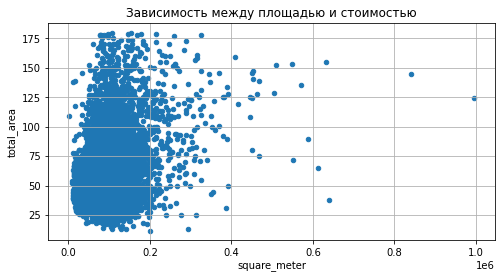

0.19997195597993758


In [20]:
# Далее необходимо выявить засисимости между стоимотью квартиры и ее площадью
new_data.plot(kind = 'scatter', x='square_meter', y='total_area', title ='Зависимость между площадью и стоимостью',  grid=True, figsize=(8,4))
plt.show()
print(new_data['square_meter'].corr(new_data['total_area']))


,last_price
rooms,
0,2.856248e+06
1,3.764206e+06
2,5.346325e+06
3,7.531625e+06
4,1.039657e+07
5,1.345066e+07


<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

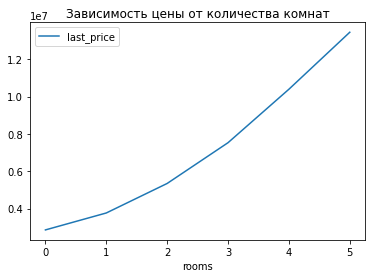

In [21]:
# зависимость цены от количества комнат
rooms_prices = new_data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
display(rooms_prices)
rooms_prices.plot(title = 'Зависимость цены от количества комнат')

In [22]:
# зависимость цены от удаленности от центра
print(new_data['last_price'].corr(new_data['cityCenters_nearest']))

-0.29805225985657063


In [23]:
# зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом
first_floor = new_data.query('floor_group == "первый"')
last_floor = new_data.query('floor_group == "последний"')
other_floor = new_data.query('floor_group == "другой"')

print(first_floor['last_price'].describe().apply(lambda x: format(x, 'f')), '\n')
print(last_floor['last_price'].describe().apply(lambda x: format(x, 'f')))
print(other_floor['last_price'].describe().apply(lambda x: format(x, 'f')))

count        2215.000000
mean      4291911.996388
std       3087423.898432
min        440000.000000
25%       2700000.000000
50%       3750000.000000
75%       5000000.000000
max      50000000.000000
Name: last_price, dtype: object 

count        2482.000000
mean      5240652.017325
std       4410213.606982
min         12190.000000
25%       2972500.000000
50%       4150000.000000
75%       6000000.000000
max      64990000.000000
Name: last_price, dtype: object
count        13818.000000
mean       5768200.680923
std        4765706.767074
min         450000.000000
25%        3500000.000000
50%        4600000.000000
75%        6500000.000000
max      124000000.000000
Name: last_price, dtype: object


In [24]:
# зависимость цены от даты размещения: дня недели, месяца и года
weekday_price = new_data.pivot_table(index='weekday', values='last_price', aggfunc='mean')
display(weekday_price)
print(new_data['last_price'].corr(new_data['weekday']))

month_price = new_data.pivot_table(index='month', values='last_price', aggfunc='mean')
display(month_price)
print(new_data['last_price'].corr(new_data['month']))

year_price = new_data.pivot_table(index='year', values='last_price', aggfunc='mean')
display(year_price)
print(new_data['last_price'].corr(new_data['year']))

,last_price
weekday,
0,5.477777e+06
1,5.563800e+06
2,5.408428e+06
3,5.616195e+06
4,5.528364e+06
5,5.629015e+06
6,5.382201e+06


0.0014218456607801959


,last_price
month,
1,5.473083e+06
2,5.510435e+06
3,5.371554e+06
4,5.499017e+06
5,5.617407e+06
6,5.544395e+06
7,5.574002e+06
8,5.530397e+06
9,5.732533e+06


0.004881443373224374


,last_price
year,
2015,6.290271e+06
2016,5.806899e+06
2017,5.600258e+06
2018,5.316143e+06
2019,5.526337e+06


-0.03913395416571107


В итоге можно наблюдать следующее:
1) Есть зависимость цены от площади -  чем больше площадь, тем выше цена.
2) Есть зависимость цены от количества комнат - чем больше комнат, тем выше цена.
3) Есть зависимость цены от удаленности от центра - цена ниже, если центр дальше.
4) Есть зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом - на первом этаже квартиры дешевле.
5) Есть зависимость цены от от даты размещения: дня недели, месяца и года, однако она слабая. 

In [25]:
# далее ищем 10 населённых пунктов с наибольшим числом объявлений
top_10_locality = new_data.groupby(
    ['locality_name']).agg({'days_exposition': 'count'}).sort_values(by='days_exposition', ascending=False
                                                                                                   )
print(top_10_locality.head(10))

                   days_exposition
locality_name                     
Санкт-Петербург              12191
посёлок Мурино                 515
посёлок Шушары                 385
Всеволожск                     308
Колпино                        292
посёлок Парголово              286
Пушкин                         276
деревня Кудрово                266
Гатчина                        243
Выборг                         193


In [26]:
# находим среднюю стоимость  квадратного метра в Санкт-Петербурге 
spb = new_data.query('locality_name == "Санкт-Петербург"')
spb_mean1 = spb['square_meter'].mean()
spb_mean = ("%.0f" % spb_mean1)
print('Средняя стоимость в Санкт-Петербурге', spb_mean)

Средняя стоимость в Санкт-Петербурге 110060


In [27]:
# находим среднюю стоимость  квадратного метра в посёлке Мурино  
murino = new_data.query('locality_name == "посёлок Мурино"')
murino_mean1 = murino['square_meter'].mean()
murino_mean = ("%.0f" % murino_mean1)
print('Средняя стоимость в посёлке Мурино ', murino_mean)

Средняя стоимость в посёлке Мурино  85957


In [28]:
# находим среднюю стоимость  квадратного метра в посёлке Шушары 
shushari = new_data.query('locality_name == "посёлок Шушары"')
shushari_mean1 = shushari['square_meter'].mean()
shushari_mean = ("%.0f" % spb_mean1)
print('Средняя стоимость в посёлке Шушары', shushari_mean)

Средняя стоимость в посёлке Шушары 110060


In [29]:
# находим среднюю стоимость  квадратного метра в Всеволожске 
vsev = new_data.query('locality_name == "Всеволожск"')
vsev_mean1 = vsev['square_meter'].mean()
vsev_mean = ("%.0f" % vsev_mean1)
print('Средняя стоимость в Всеволожске', vsev_mean)

Средняя стоимость в Всеволожске 68606


In [30]:
# находим среднюю стоимость  квадратного метра в Колпино 
koplino = new_data.query('locality_name == "Колпино"')
koplino_mean1 = koplino['square_meter'].mean()
koplino_mean = ("%.0f" % koplino_mean1)
print('Средняя стоимость в Колпино', koplino_mean)

Средняя стоимость в Колпино 74672


In [31]:
# находим среднюю стоимость  квадратного метра в посёлке Парголово  
pargolovo = new_data.query('locality_name == "посёлок Парголово"')
pargolovo_mean1 = pargolovo['square_meter'].mean()
pargolovo_mean = ("%.0f" % pargolovo_mean1)
print('Средняя стоимость в посёлке Парголово ', pargolovo_mean)

Средняя стоимость в посёлке Парголово  89361


In [32]:
# находим среднюю стоимость  квадратного метра в Пушкине
pushkin = new_data.query('locality_name == "Пушкин"')
pushkin_mean1 = pushkin['square_meter'].mean()
pushkin_mean = ("%.0f" % pushkin_mean1)
print('Средняя стоимость в Пушкине', pushkin_mean)

Средняя стоимость в Пушкине 101892


In [33]:
# находим среднюю стоимость  квадратного метра деревне Кудрово 
kudrovo = new_data.query('locality_name == "деревня Кудрово"')
kudrovo_mean1 = kudrovo['square_meter'].mean()
kudrovo_mean = ("%.0f" % kudrovo_mean1)
print('Средняя стоимость в деревне Кудрово', kudrovo_mean)

Средняя стоимость в деревне Кудрово 92657


In [34]:
# находим среднюю стоимость  квадратного метра в Гатчине 
gatchina = new_data.query('locality_name == "Гатчина"')
gatchina_mean1 = gatchina['square_meter'].mean()
gatchina_mean = ("%.0f" % gatchina_mean1)
print('Средняя стоимость в Гатчине', gatchina_mean)

Средняя стоимость в Гатчине 68077


In [35]:
# находим среднюю стоимость  квадратного метра в Выборге 
viborg = new_data.query('locality_name == "Выборг"')
viborg_mean1 = viborg['square_meter'].mean()
viborg_mean = ("%.0f" % viborg_mean1)
print('Средняя стоимость в Выборге', viborg_mean)

Средняя стоимость в Выборге 57011


Населенные пункты с самой высокой стоимостью жилья это - Санкт-Петербург, Шушары и Пушкин.
Населенные пункты с самой низкой стоимостью жилья это Выборг, Всеволожск и Гатчина.

/tmp/ipykernel_86/1485681185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_data['centre_distance_km'] = (spb_data['cityCenters_nearest'] / 1000).round()


<AxesSubplot:xlabel='centre_distance_km'>

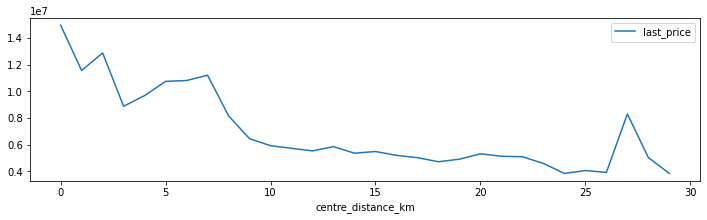

In [36]:
# Изучаем предложения квартир
spb_data = new_data.query('locality_name == "Санкт-Петербург"')
spb_data['centre_distance_km'] = (spb_data['cityCenters_nearest'] / 1000).round()
spb_data.groupby(['centre_distance_km']).agg({'last_price': 'mean'}).round().plot(figsize=(12,3))

Построили график, который показывает, как меняется цена на каждом км отдаления от центра. Из графика вы видим, что цена резко меняется на занчении 7 км. Это значит, что квартиры "в центре" находятся не далее, чем 7 км. 
Интересно также наблюдать скачек цен после 25 км. Возможно, это какой-то элитный поселок. 

In [37]:
# Выделяем и изучаем сегмент квартир в центр
flats_centre = new_data.query('cityCenters_nearest <= 7000')
# посмотрим, какие значение locality_name остались в датафрейме
flats_centre['locality_name'].value_counts()

Санкт-Петербург    2147
unknown              11
Name: locality_name, dtype: int64

count    2158.000000
mean       77.408387
std        32.224279
min        12.000000
25%        52.275000
50%        72.000000
75%        96.000000
max       179.600000
Name: total_area, dtype: float64

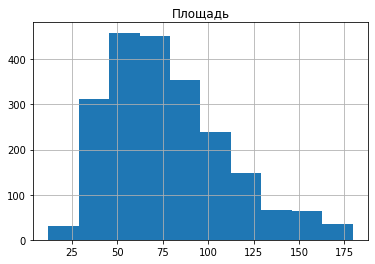

In [38]:
# изучиv следующие параметры: площадь, цена, число комнат, высота потолков
# посмотрим на площадь
flats_centre['total_area'].hist()
plt.title('Площадь')
flats_centre['total_area'].describe()

count         2158.000000
mean      10593644.920760
std        8552630.944392
min        1600000.000000
25%        6200000.000000
50%        8277475.000000
75%       11972500.000000
max      124000000.000000
Name: last_price, dtype: object

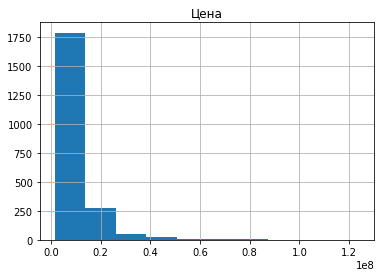

In [39]:
# посмотрим на цену
flats_centre['last_price'].hist()
plt.title('Цена')
flats_centre['last_price'].describe().apply(lambda x: format(x, 'f'))

count    2158.000000
mean        2.528267
std         1.069616
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

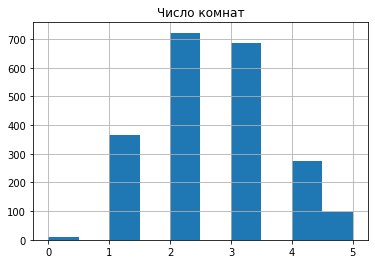

In [40]:
# посмотрим на число комнат
flats_centre['rooms'].hist()
plt.title('Число комнат')
flats_centre['rooms'].describe()

count    2158.000000
mean        2.920181
std         0.317108
min         2.400000
25%         2.700000
50%         2.750000
75%         3.100000
max         4.800000
Name: ceiling_height, dtype: float64

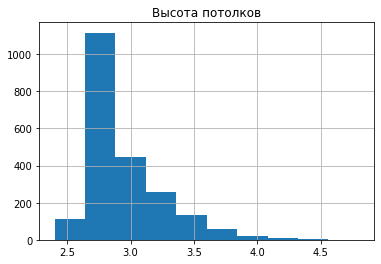

In [41]:
# посмотрим на высоту потолков
flats_centre['ceiling_height'].hist()
plt.title('Высота потолков')
flats_centre['ceiling_height'].describe()

Тз гистограмм видим, что в центре превалируют небольшие квартиры плозадью от 30 до 160 метров, со стандартной высотой потолков (2.7 метра), средняя цена превышает 8000000 рублей и эти квартиры в основном 2х или 3х комнатные.

,last_price
rooms,
0,4.143273e+06
1,6.513363e+06
2,8.978067e+06
3,1.262267e+07
4,1.395467e+07
5,1.484689e+07


<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

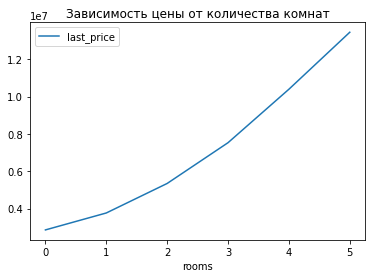

In [42]:
# выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)
# начнем с числа комнат
rooms_prices_centre = flats_centre.pivot_table(index='rooms', values='last_price', aggfunc='mean')
display(rooms_prices_centre)
rooms_prices.plot(title = 'Зависимость цены от количества комнат')


0.15920318710354028


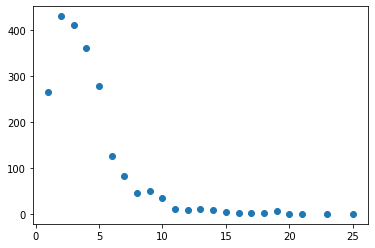

In [43]:
# зависимость между этажем и ценой
flats_centre['floor'].value_counts().plot(style='o')
print(flats_centre['last_price'].corr(flats_centre['floor']))

In [44]:
# зависимость между ценой и удаленностью от центра
print(flats_centre['last_price'].corr(flats_centre['cityCenters_nearest']))

-0.030800103372010175


,last_price
first_day_exposition,
2015-02-26,7700000.0
2015-03-12,5900000.0
2015-03-23,3400000.0
2015-04-06,13400000.0
2015-04-28,11000000.0
...,...
2019-04-12,9000000.0
2019-04-16,6190000.0
2019-04-18,7200000.0


<AxesSubplot:xlabel='first_day_exposition'>

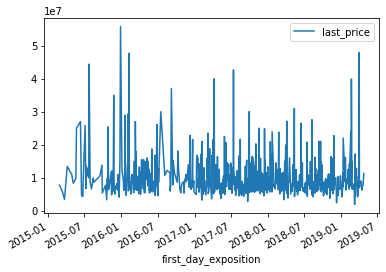

In [45]:
# зависимость между этажем и даты размещения объявления
price_to_date = (flats_centre.pivot_table(index='first_day_exposition', values='last_price', aggfunc='median').round())
display(price_to_date)
price_to_date.plot()


### Вывод


Главным фактором, влияющим на стоимоcть квартиры в центре, являются количество комнат. 
Этаж слабо влияет на цену, однако небольшая зависимость есть.
Из данных видно, что на графике зависимости цены от дня есть пики, однако это можно объяснить продажей отдельных дорогих квартир.
Зависимость между ценой и удаленностью от центра здесь практически нет, тк квартиры и так расположены в центре. 

Если сравнить факторы, влияющие на стоимость квартир в центре и во всех районах, которые исследовались выше, можно заметить, что удаленность от центра играла важную роль, когда речь шла обо всех квартирах из базы данных, однако, эта зависимость исчезла, когда мы рассматривали квартиры в центре.
Также наблюдается более сильная зависимость от этажа во всем городе, а то время как в центре этаж не так сильно влияет на стоимость.
Самая сильная зависимость, которая просматривается и в центре и во всем городе, это зависимость цены от количества комнат.
Самая несущественная зависимость наблюдается между ценой и датой продажи.

## Общий вывод

В данном проекте были проанализированы данные архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо было выявить рыночную стоимость объектов недвижимости, установить параметры, построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу были доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

На первом этапы выгрузили данные. Прежде чем приступить к их изучению необходимо было воспользоваться разделителем 'sep' для того, чтобы данные имели читаемый вид. Далее изучили данные и определили и изучили пропущенные значения. 

В таблице изначально было 22 столбца и 23699 строк. Тип данных во всех столбцах — bool, float64, int64, object.
С столбцах поочередно провели проверку данных при помощи методов value_counts(), min(), max(). Во многих столбцах было много пропусков. Данные были выгружены из двух источников, в том числе, один из источников заполнялся вручную, возможно, это стало причиной такого большого количества пропусков. Пропуски заполнялись различными данными:
- в ceiling_height заменили все пропуски на стандартную высоту потолков в новостройке;
- в floors_total произвели замену на среднюю высоту многоквартирных домов, т.е 16;
- в is_apartment доля пропусков существенна, однако их стоит заменить на False, так как люди имеющие апартаменты ответили бы "да";
- в balcony логично заменить пропуски на 0, так как если человек не указал количество балконов, видимо их нет;
- в locality_name здесь пропуски можно заменить на unknown, их доля незначительна;
- в airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest пропуски заменили на медианные значения.
Во время заполнения пропусков также произвели замену некоторых типов данных. Столбец first_day_exposition перевели в datetime64, is_apartment полностью в bool. Также убрали варианты "поселок" и заменила на "посёлок".

На следующем этапе проекта посчитали и добавили данные:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

На этапе исследовательского анализа сначала были изучены следующие параметры: площадь, цена, число комнат, высота потолков и время продажи квартир. Для этого были построены гистограммы и диаграммы размаха для каждого параметра. Это позволило выявить аномалии в данных и избавиться от них.
Так диаграмма размаха для времени продажи подтверждает, что значения больше 500 выходит за пределы размаха (1.5 кв), а это значит, это и есть необычно долгие продажи. Нижний размах совпадает с нулем, это значит, что даже продажи быстрее, чем 45 дней не являются аномалиями, однако являются редкими. Были обнаружены выбросы в столбце rooms. Из диаграмм видим, что квартиры с более чем 6 комнатами являются аномалиями. В столбце total_area выбросы начинаются со значения 180 м. Для last_price нормальной ценой можно считать от 1000000 до 35000000.

На следующем этапе исследовали зависимость цены от от площади, числа комнат, удалённости от центра и от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучили зависимость от даты размещения: дня недели, месяца и года. В итоге выявили зависимости цены от первых 4х факторов (чем больше площадь, тем выше цена, чем больше комнат, тем выше цена, цена ниже, если центр дальше, на первом этаже квартиры дешевле). Было также выявлено, что зависимость цены  от даты размещения есть, однако она слабая. 

Далее выбрали 10 населённых пунктов с наибольшим числом объявлений. Посчитали среднюю цену квадратного метра в этих населённых пунктах и выделили населённые пункты с самой высокой и низкой стоимостью жилья ( Санкт-Петербург, Шушары, Пушкин 
Выборг, Всеволожск и Гатчина соответственно).

Далее выяснили, какая область входит в центр - 7 км. Для этого построили график зависимости изменения цены от километра удаления от центра и изучили объявления в этих рамках. Проанализировали следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры. Главным фактором является количество комнат. Наблюдали слабую зависимость между ценой и этажом, однако заметили, что зависимости между ценой и удаленностью от центра здесь практически нет, т.к. квартиры и так расположены в центре. 

Далее сравнили факторы, влияющие на стоимость квартир в центре и во всех районах, которые исследовались выше и заметили, что удаленность от центра играла важную роль, когда речь шла обо всех квартирах из базы данных, однако, эта зависимость исчезла, когда мы рассматривали квартиры в центре.
Также наблюдается более сильная зависимость от этажа во всем городе, а то время как в центре этаж не так сильно влияет на стоимость.
Самая сильная зависимость, которая просматривается и в центре и во всем городе, это зависимость цены от количества комнат.
Самая несущественная зависимость наблюдается между ценой и датой продажи.




